In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# visualization
import seaborn as sns
# Importing the dataset
dataset =pd.read_csv('cleaned.csv')

In [3]:
# list of first five rows
dataset.head

<bound method NDFrame.head of        item_id  user_id  rating  timestamp  gender    category       brand  \
0            7      131       4      36692  Female  Home Audio     Philips   
1           19      231       5      36891  Female      Camera       Canon   
2           14      233       5      36893  Female      Camera       Kodak   
3           14      257       5      36926  Female      Camera       Kodak   
4           14      269       5      36952  Female      Camera       Kodak   
...        ...      ...     ...        ...     ...         ...         ...   
45161     7828  1157458       5      43341  Female  Headphones        Bose   
45162     8624  1157504       5      43342  Female  Headphones        Pyle   
45163     9513  1157527       5      43344    Male  Headphones        Mpow   
45164     9125  1157555       3      43348  Female  Headphones      EldHus   
45165     9478  1157632       1      43374  Female  Headphones  Etre Jeune   

       year  month  quantity  uni

In [4]:
# list of last five rows
dataset.tail()


,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [5]:
# shape
dataset.shape

(45166, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [7]:
#see the number of unique users and items in the dataset.
dataset.nunique()


item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [8]:
# check for missing values
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

# What was the best year of sales?


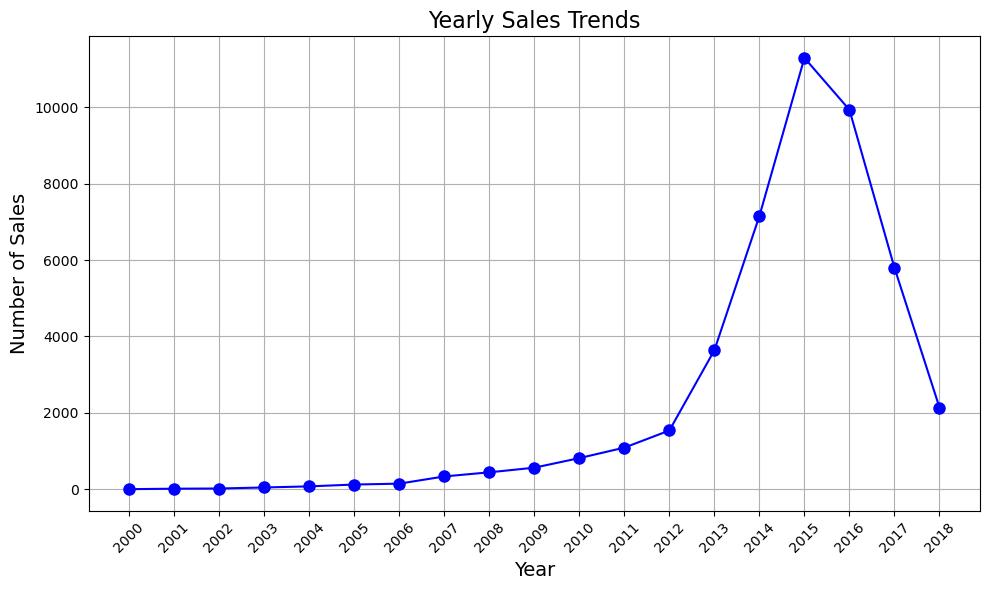

In [11]:
import matplotlib.pyplot as plt

# Grouping the dataset by year and counting sales
yearly_sales = dataset.groupby('year')['amount'].count()

# Creating a line plot for better trend visualization
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Yearly Sales Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(yearly_sales.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Which was the best month for sales between 2015 t0 2018


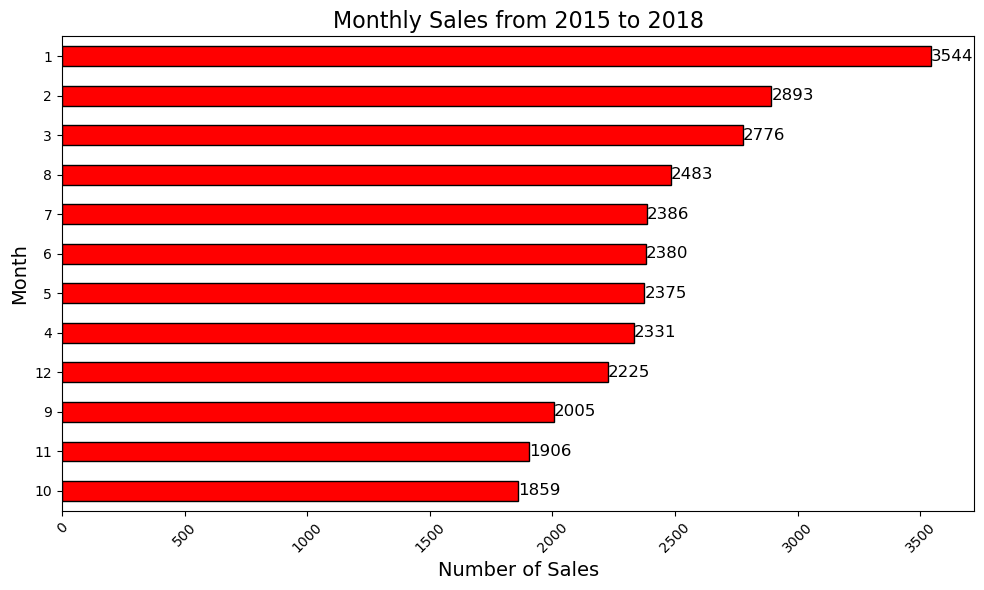

In [19]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by month and counting sales
monthly_sales = dataset_2015_2018.groupby('month')['rating'].count()

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
bars = monthly_sales.sort_values().plot(kind='barh', color='red', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(monthly_sales.sort_values()):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.title('Monthly Sales from 2015 to 2018', fontsize=16)
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(rotation=45)

# Removing grid lines
# plt.grid(axis='x')  # This line is commented out to remove grid lines

plt.tight_layout()
plt.show()

## What brand sold the most in the highest selling year(2015 to 2018)

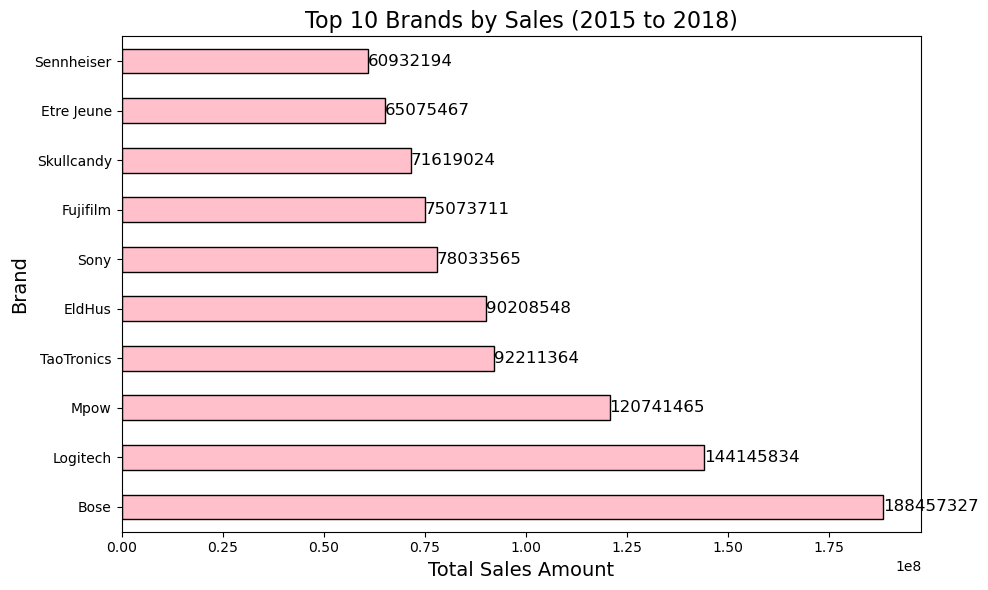

In [22]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by brand and summing sales amounts
brand_sales = dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=False)

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
brand_sales.head(10).plot(kind='barh', color='pink', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(brand_sales.head(10)):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.title('Top 10 Brands by Sales (2015 to 2018)', fontsize=16)
plt.xlabel('Total Sales Amount', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.tight_layout()
plt.show()

## What products sold the most in the three years 2016, 2017 & 2018


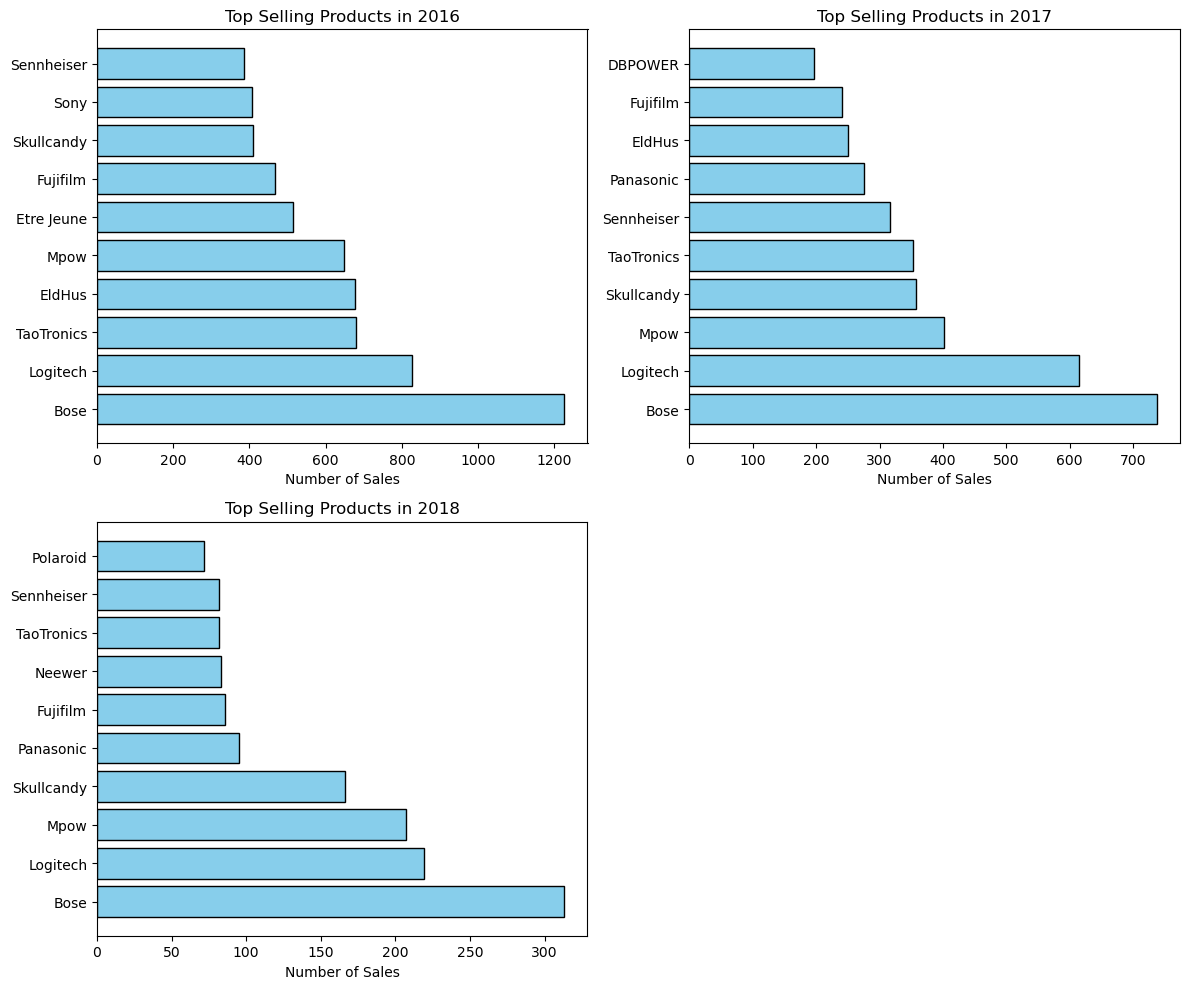

In [24]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for 2016
top_selling_2016 = dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 0].barh(top_selling_2016.index, top_selling_2016, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].set_xlabel('Number of Sales')
axs[0, 0].tick_params(axis='y', rotation=0) # Rotate y-axis labels

# Plot for 2017
top_selling_2017 = dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].barh(top_selling_2017.index, top_selling_2017, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].set_xlabel('Number of Sales')
axs[0, 1].tick_params(axis='y', rotation=0) # Rotate y-axis labels

# Plot for 2018
top_selling_2018 = dataset[dataset['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].barh(top_selling_2018.index, top_selling_2018, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].set_xlabel('Number of Sales')
axs[1, 0].tick_params(axis='y', rotation=0) # Rotate y-axis labels

# Hide the empty subplot
axs[1, 1].axis('off')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

# What product by category sold the most between 2015 to 2018?


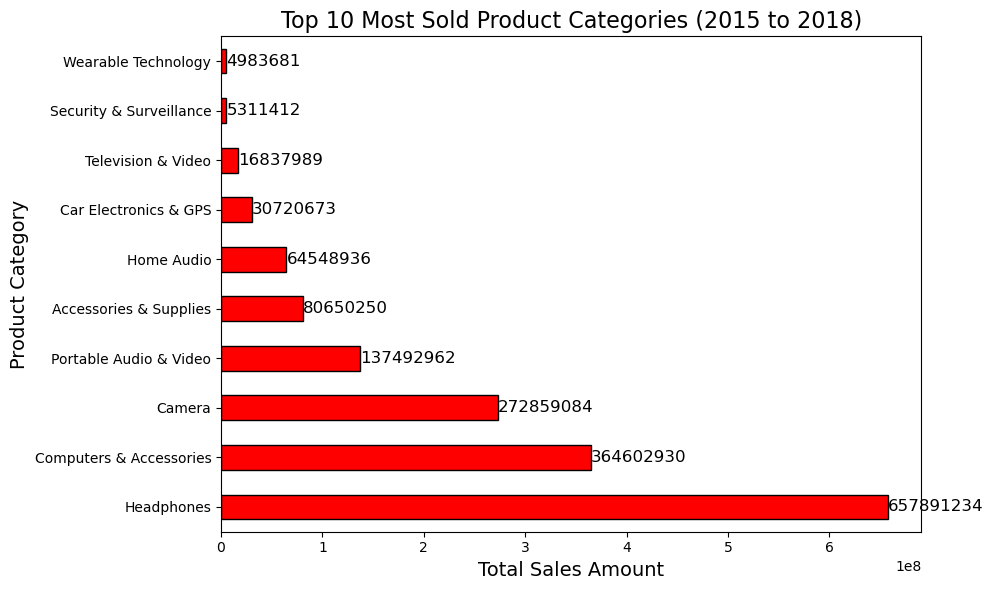

In [26]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by category and summing sales amounts
category_sales = dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False)

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
category_sales.head(10).plot(kind='barh', color='red', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(category_sales.head(10)):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.title('Top 10 Most Sold Product Categories (2015 to 2018)', fontsize=16)
plt.xlabel('Total Sales Amount', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.tight_layout()
plt.show()

# What product by category sold the least between 2015 to 2018?

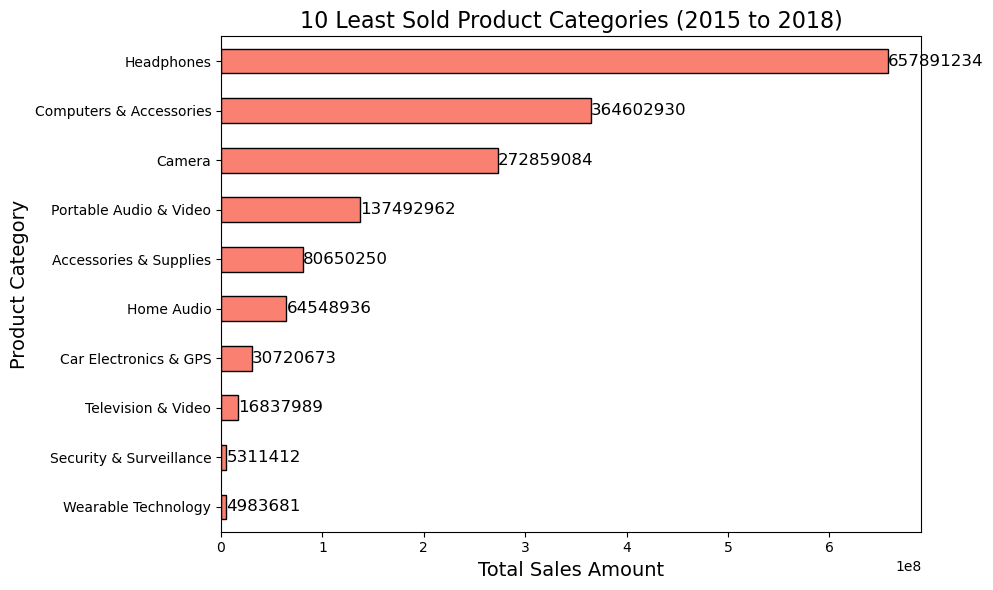

In [27]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by category and summing sales amounts
category_sales_least = dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True)

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
category_sales_least.head(10).plot(kind='barh', color='salmon', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(category_sales_least.head(10)):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.title('10 Least Sold Product Categories (2015 to 2018)', fontsize=16)
plt.xlabel('Total Sales Amount', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.tight_layout()
plt.show()

## What product by brand name sold the least between 2015 to 2018?

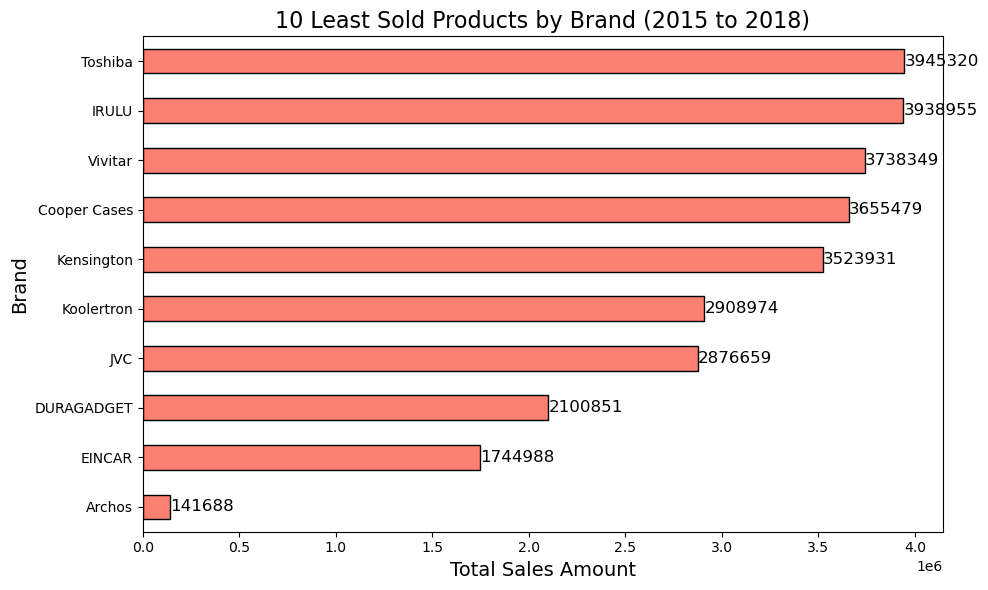

In [28]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by brand and summing sales amounts
brand_sales_least = dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True)

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
brand_sales_least.head(10).plot(kind='barh', color='salmon', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(brand_sales_least.head(10)):
    plt.text(value, index, str(value), va='center', fontsize=12)

plt.title('10 Least Sold Products by Brand (2015 to 2018)', fontsize=16)
plt.xlabel('Total Sales Amount', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.tight_layout()
plt.show()

##  Ratings Distribution


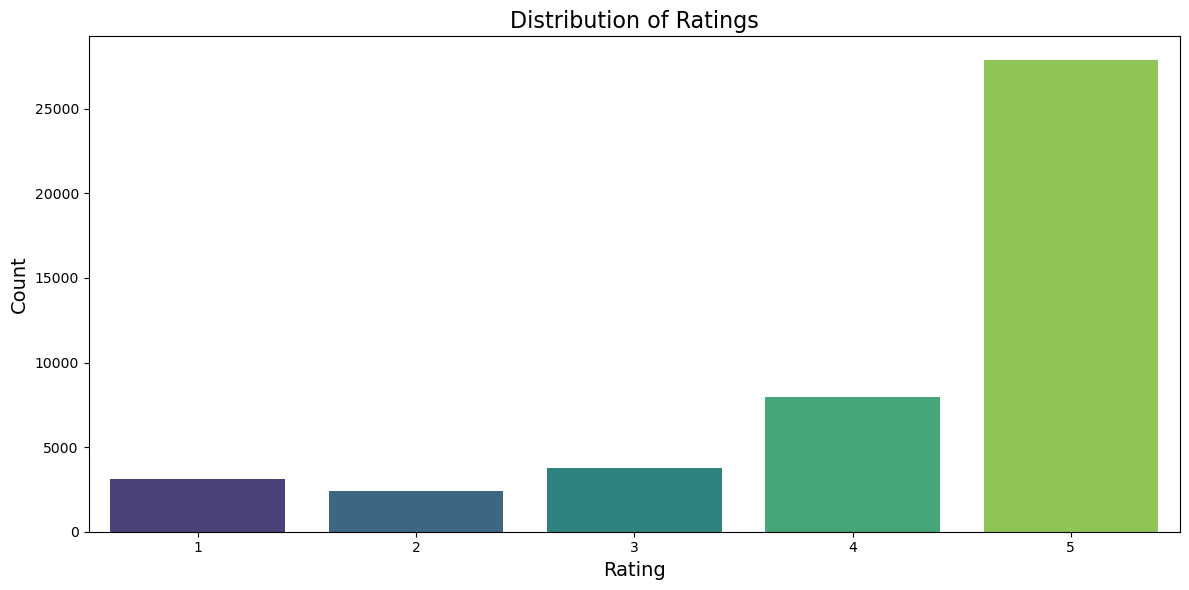

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot for the distribution of ratings
sns.countplot(x='rating', data=dataset, palette='viridis')

# Adding title and labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Best rated brands

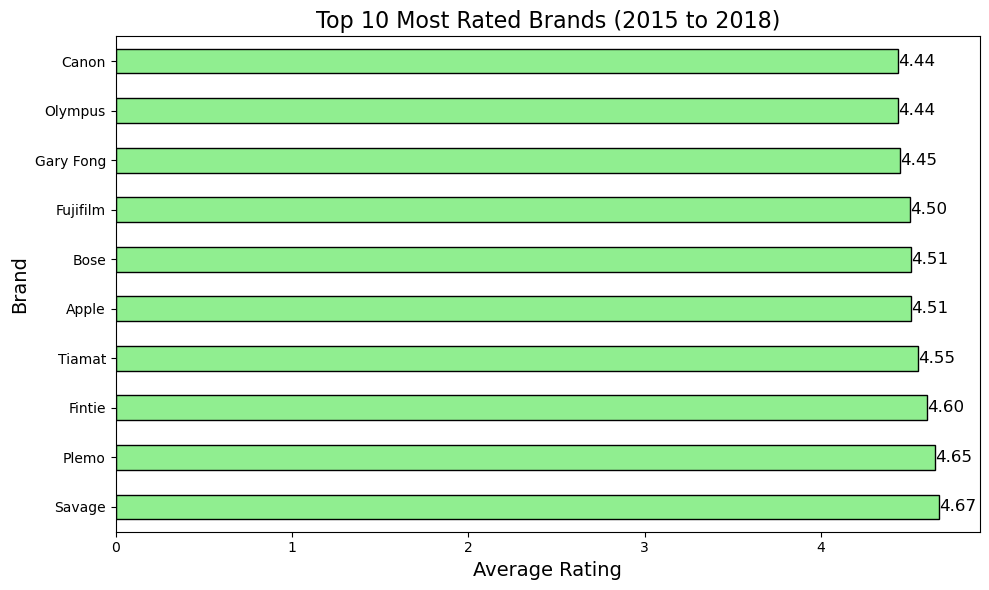

In [30]:
import matplotlib.pyplot as plt

# Filtering the dataset for the years 2015 to 2018
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Grouping by brand and calculating the mean rating
top_rated_brands = dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False)

# Creating a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))
top_rated_brands.head(10).plot(kind='barh', color='lightgreen', edgecolor='black')

# Adding exact values in front of each bar
for index, value in enumerate(top_rated_brands.head(10)):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

plt.title('Top 10 Most Rated Brands (2015 to 2018)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.tight_layout()
plt.show()

##  Top 5 category sales percentage


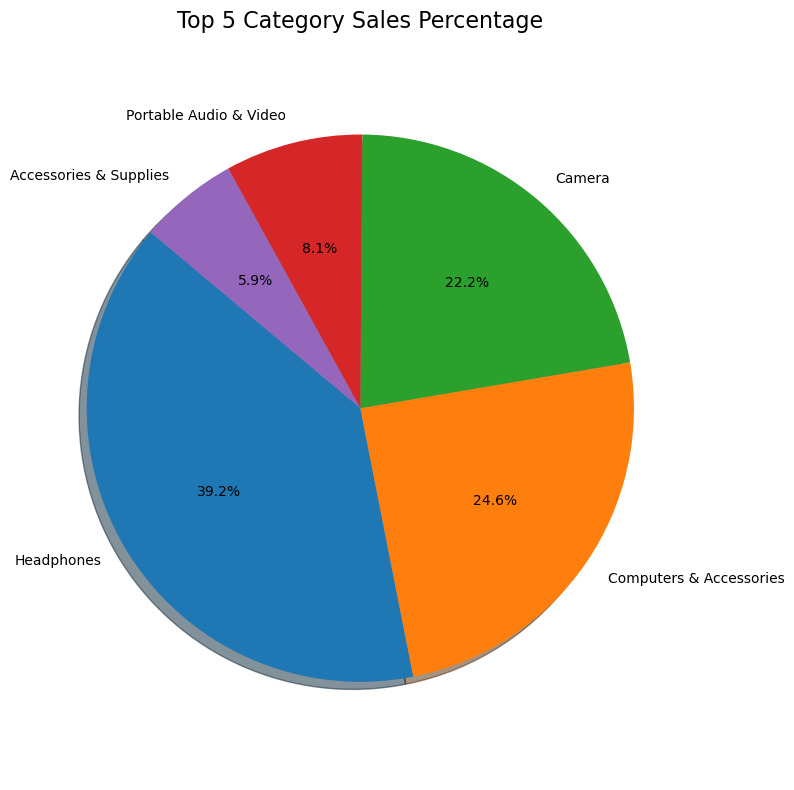

In [31]:
import matplotlib.pyplot as plt

# Grouping by category and summing sales amounts
top_categories = dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5)

# Creating a pie chart for the top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Adding title
plt.title('Top 5 Category Sales Percentage', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Brand wise sales percentage

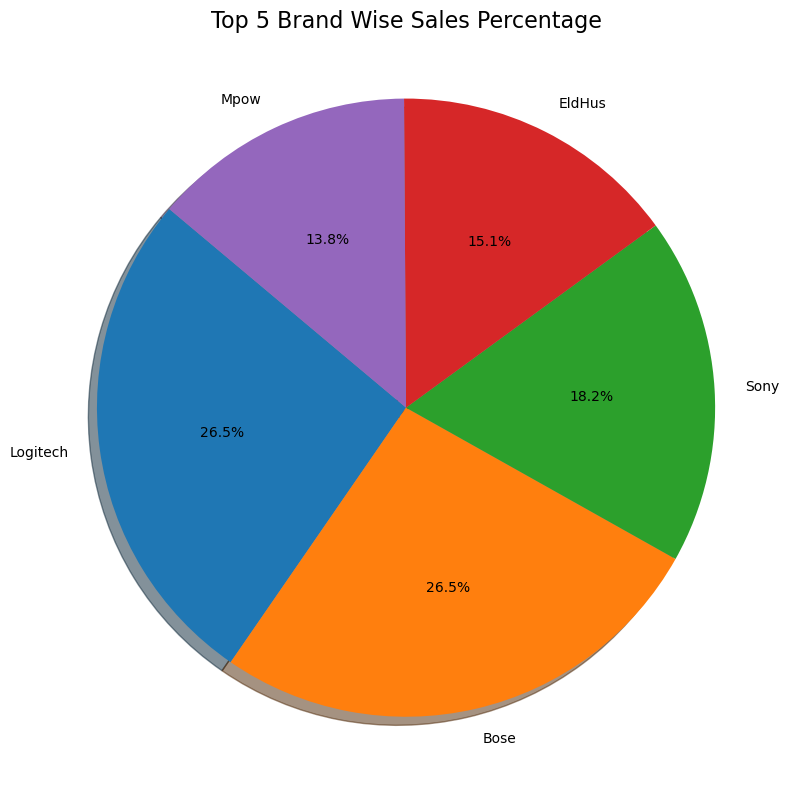

In [32]:
import matplotlib.pyplot as plt

# Grouping by brand and counting sales
top_brands = dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5)

# Creating a pie chart for the top 5 brands
plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Adding title
plt.title('Top 5 Brand Wise Sales Percentage', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

##  Gender wise customer distribution


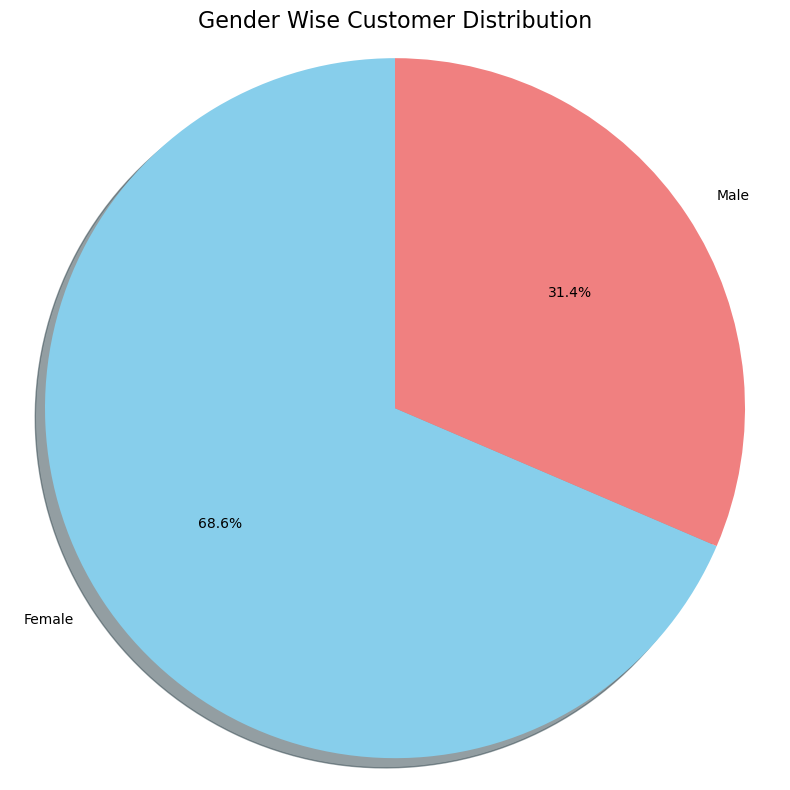

In [33]:
import matplotlib.pyplot as plt

# Calculating gender distribution
gender_distribution = dataset['gender'].value_counts()

# Creating a pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index,
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], shadow=True)

# Adding title
plt.title('Gender Wise Customer Distribution', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()